Load the MNIST dataset and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing). Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set. Next, use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%. Train a new Random Forest classifier on the reduced dataset and see how long it takes. Was training much faster? Next evaluate the classifier on the test set: how does it compare to the previous classifier?

### 1) Load the MNIST dataset

In [ ]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


### 2) Investigate the shapes of your data

In [ ]:
num_classes = np.unique(Y_train).shape[0]
print("Shape of training dataset:", X_train.shape)
print("Number of training examples:", X_train.shape[0])
print("Number of testing examples:", X_test.shape[0])
print("Number of classes:", num_classes)
print("Image shape:", X_train[0].shape)
print("Image data type:", X_train.dtype)

Shape of training dataset: (60000, 28, 28)
Number of training examples: 60000
Number of testing examples: 10000
Number of classes: 10
Image shape: (28, 28)
Image data type: uint8


In [ ]:
#[[1,2],[3,4]] -> [1,2,3,4]

### 3) Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time

rd_model = RandomForestClassifier()
nsamples, nx, ny = X_train.shape
nsamples2, _, _ = X_test.shape
X_train_2d = X_train.reshape((nsamples,nx*ny))
X_test_2d = X_test.reshape((nsamples2,nx*ny))

start_time=time.time()
rd_model.fit(X_train_2d,Y_train)
end_time=time.time()
diff_time=(end_time-start_time)
print("It took %.2f ms to train the model." % diff_time)

Y_train_pred = rd_model.predict(X_train_2d)
Y_test_pred = rd_model.predict(X_test_2d)
print("Training accuracy is:", accuracy_score(y_pred=Y_train_pred, y_true=Y_train))
print("Testing accuracy is:", accuracy_score(y_pred=Y_test_pred, y_true=Y_test))

It took 44.18 ms to train the model.
Training accuracy is: 1.0
Testing accuracy is: 0.9701


In [ ]:
Y_train.shape

(60000,)

In [ ]:
X_train.shape

(60000, 28, 28)

### 4) Use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)

X_train_pca = pca.fit_transform(X_train_2d)
X_test_pca = pca.transform(X_test_2d)
print("Total explained variance ratio is: %.2f" % (sum(pca.explained_variance_ratio_)*100))


print(X_train_2d.shape)
print(X_train_pca.shape)
print(X_test_pca.shape)

Total explained variance ratio is: 95.02
(60000, 784)
(60000, 154)
(10000, 154)


In [ ]:
? PCA

### 5) Train a new Random Forest classifier on the reduced dataset and see how long it takes.

In [ ]:
rd_model_with_pca = RandomForestClassifier() #min_impurity_decrease=0.0001)

start_time=time.time()
rd_model_with_pca.fit(X_train_pca,Y_train)
end_time=time.time()
diff=(end_time-start_time)
print("It took %.2f ms to train the model." % diff)

Y_train_pca_pred = rd_model_with_pca.predict(X_train_pca)
print("Training accuracy is:", accuracy_score(y_pred=Y_train_pca_pred, y_true=Y_train))
Y_test_pca_pred = rd_model_with_pca.predict(X_test_pca)
print("Testing accuracy is:", accuracy_score(y_pred=Y_test_pca_pred, y_true=Y_test))

It took 56263.25 ms to train the model.
Training accuracy is: 1.0
Training accuracy is: 0.954


### 6) Was training much faster?

dimensionality reduction does not always lead to faster training time: it depends on the dataset, the model and the training algorithm.

### 7) Next evaluate the classifier on the test set: how does it compare to the previous classifier?

In [ ]:
Y_test_pca_pred = rd_model_with_pca.predict(X_test_pca)
print("Testing accuracy is:", accuracy_score(y_pred=Y_test_pca_pred, y_true=Y_test))

Testing accuracy is: 0.9501


It is common for performance to drop slightly when reducing dimensionality, because we do lose some useful signal in the process. However, the performance drop is rather severe in this case. So PCA really did not help: it slowed down training and reduced performance.

### 8) Choose different number of features between 1 and 784 and plot:
1. Variance explained with PCA
2. Train & test accuracies

In [ ]:
train_acc_score=[]
test_acc_score=[]
from tqdm import tqdm

for i in tqdm(list(range(10,500,50))):
  pca = PCA(n_components = i)
  X_train_pca = pca.fit_transform(X_train_2d)
  X_test_pca = pca.transform(X_test_2d)
 
  model_pca=RandomForestClassifier(random_state=0)
  model_pca.fit(X_train_pca,Y_train)
  y_train_pca_pred=model_pca.predict(X_train_pca)
  train_acc_score.append(accuracy_score(Y_train,y_train_pca_pred))
  y_test_pca_pred=model_pca.predict(X_test_pca)
  test_acc_score.append(accuracy_score(Y_test,y_test_pca_pred))



  0%|          | 0/10 [00:00<?, ?it/s]

 10%|█         | 1/10 [00:33<04:59, 33.33s/it]

 20%|██        | 2/10 [01:53<06:18, 47.32s/it]

 30%|███       | 3/10 [03:40<07:37, 65.42s/it]

 40%|████      | 4/10 [05:51<08:29, 84.93s/it]

 50%|█████     | 5/10 [08:28<08:52, 106.58s/it]

 60%|██████    | 6/10 [11:22<08:27, 126.94s/it]

 70%|███████   | 7/10 [14:32<07:17, 145.82s/it]

 80%|████████  | 8/10 [17:55<05:25, 162.77s/it]

 90%|█████████ | 9/10 [21:46<03:03, 183.35s/it]

100%|██████████| 10/10 [25:58<00:00, 155.84s/it]


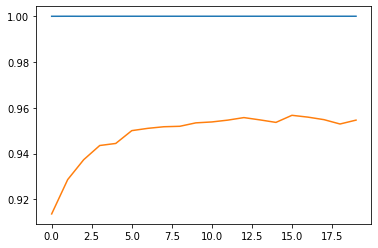

In [ ]:
#print(train_acc_score)
#print(test_acc_score)
plt.plot(train_acc_score)
plt.plot(test_acc_score)


### 1) Implement PCA from scratch: 
You have input data $(x_1,\dots, x_n)$ which is $d$-dimensional and number of projections $k$, return new data and percentage of you data explained. Test your function on different data.

In [ ]:
def pca_from_scratch(X,k):
  print("PCA method from scratch")
  print("number of projections k:", k)
  X=X-np.mean(X,axis=0)
  s, w = np.linalg.eig(X.T.dot(X))
  idx = s.argsort()[::-1]  
  s = s[idx]
  w = w[:,idx]
  X_new = X.dot(w[:,:k])
  s=np.array(sorted(s,reverse=True))
  explained_data=sum(abs(s[:k]))/sum(abs(s))
  return (X_new, explained_data)

In [ ]:
X = np.array([[1, 2], [1.5, 1.8], [5, 8 ], [8, 8],[1, 0.6],[9,11],[1,3],[8,9],[0,3], [5,4],[6,4]])
x_new, explained_data = pca_from_scratch(X,1) #X_train_2d[:1000],154)
print(X_train_2d.shape,x_new.shape,explained_data)

PCA method from scratch
number of projections k: 1
[ 13.72385581 674.12614419]
(60000, 784) (11, 1) 0.019951814798384815


### 2) Implement K-means from scratch: 
You have input data $(x_1,\dots, x_n)$ which is $d$-dimensional and number of clusters $k$, return clustered data. Test your function on different data.

In [ ]:
class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

484.7222222222223
13.0
52.10727969348656


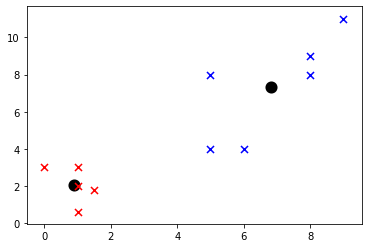

In [ ]:
X = np.array([[1, 2], [1.5, 1.8], [5, 8 ], [8, 8],[1, 0.6],[9,11],[1,3],[8,9],[0,3], [5,4],[6,4]])
colors = ['red','blue']
clf = K_Means()
clf.fit(X)

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k", s=50, linewidths=5)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=50, linewidths=5)
        
plt.show()